# **Customer Segmentation using K-Means Clustering**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

Display Top 5 Rows

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Check last 5 rows

In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


To find shape of dataset

In [ ]:
data.shape

(200, 5)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 200
Number of Columns 5


Information about data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

To get overall statistics

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **K-Means Clustering**

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans()
k_means.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
k_means = KMeans()
k_means.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 3, 5, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 6, 2, 6, 2,
       1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 1, 2, 6, 2, 1, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 1, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7, 4, 7,
       4, 7], dtype=int32)

**Elbow method to find Optimal Number of Cluster**

In [ ]:
wcss = []
for i in range(1,11):
  k_means = KMeans(n_clusters=i)
  k_means.fit(X)
  wcss.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30566.45113025185,
 25029.25342493587,
 21829.13563877983,
 19646.482018947238]

In [ ]:
import matplotlib.pyplot as plt

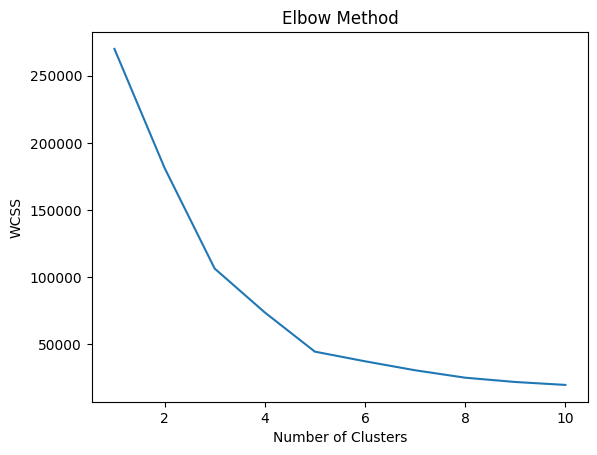

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Model Training**

In [ ]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
k_means = KMeans(n_clusters=5,random_state=42)
y_means = k_means.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

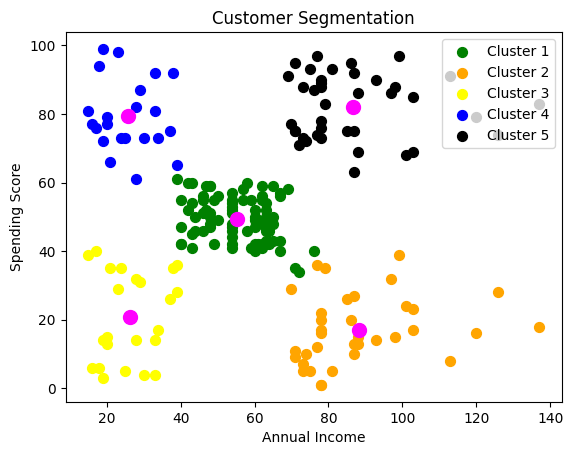

In [ ]:
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=50,c='orange',label='Cluster 2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=50,c='black',label='Cluster 5')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=100,c="magenta")
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(loc='upper right')
plt.show()

In [ ]:
k_means.predict([[15,39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

# **Save the Model**

In [ ]:
# Load the data
data = pd.read_csv('/content/Mall_Customers.csv')

# Prepare the data
X = data[['Annual Income (k$)','Spending Score (1-100)']]

# Train the KMeans model
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

# Save the model
joblib.dump(k_means, "customer_segmentation")

# Load the model
model = joblib.load("customer_segmentation")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
model.predict([[15,39]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

# **GUI- Graphical User Interface**

In [ ]:
!pip install ipywidgets


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import joblib
import ipywidgets as widgets
from IPython.display import display


# Function to predict the cluster
def predict_cluster(annual_income, spending_score):
    result = model.predict([[annual_income, spending_score]])[0]
    cluster_messages = [
        "Customer with medium annual income and medium annual spending score",
        "Customer with high annual income but low annual spending score",
        "Customer with low annual income and low annual spending score",
        "Customer with low annual income but high annual spending score",
        "Customer with high annual income and high annual spending score"
    ]
    return f"This Customer belongs to cluster no: {result} ({cluster_messages[result]})"

# Create widgets
annual_income_widget = widgets.IntText(description='Annual Income:')
spending_score_widget = widgets.IntText(description='Spending Score:')
output_widget = widgets.Output()

def on_button_clicked(b):
    with output_widget:
        output_widget.clear_output()
        annual_income = annual_income_widget.value
        spending_score = spending_score_widget.value
        result = predict_cluster(annual_income, spending_score)
        print(result)

button = widgets.Button(description="Predict")
button.on_click(on_button_clicked)

# Display widgets
display(annual_income_widget, spending_score_widget, button, output_widget)


IntText(value=0, description='Annual Income:')

IntText(value=0, description='Spending Score:')

Button(description='Predict', style=ButtonStyle())

Output()